In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [2]:
# Auth
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id="",
                                                           client_secret=""))

In [3]:
# Recieving Data from Spotify
show = sp.search(q='پادکست', type='show', market='US', offset=0, limit=50)

In [4]:
names = []
description = []
publisher = []
total_episodes = []
external_urls = []
for i in range(40):
    show = sp.search(q='پادکست', type='show', market='US', offset=i*50, limit=50)
    show = show['shows']['items']
    for e in show:
        names.append(e['name'])
        description.append(e['description'])
        publisher.append(e['publisher'])
        total_episodes.append(e['total_episodes'])
        external_urls.append(e['external_urls']['spotify'])

In [5]:
names = pd.Series(names)
description = pd.Series(description)
publisher = pd.Series(publisher)
total_episodes = pd.Series(total_episodes)
external_urls = pd.Series(external_urls)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

# Names

In [6]:
names

0                                                                                      ChannelB پادکست فارسی
1                                                                  Masty o Rasty | پادکست فارسی مستی و راستی
2                                                                              Radio Deev / پادکست رادیو دیو
3                                                                          پادکست روانشناسی شخصیت‌ و خوشبختی
4                                                                                                  پادکست رخ
5                                                                     ‌BPLUS بی‌پلاس پادکست فارسی خلاصه کتاب
6                                               پادکست فارسی ناوکست / Navcast/ترجمهٔ مستقل کتاب انسان خردمند
7                                                                                        پادکست مختصر و مفید
8                                                                                       On podcast پادکست آن
9                  

# Descriptions

In [7]:
description

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

# Publishers

In [8]:
publisher

0                                                         Ali Bandari
1                                                           King Raam
2                                                           RadioDeev
3                                         اساتید روانشناسی دانشگاه‌ها
4                                                        Rokh Podcast
5                                                         Ali Bandari
6                                                        Roshan Abady
7                                                     Ardeshir Tayebi
8                                                              mersen
9                                                        فرشاد محمودی
10                                                    Saman Karampour
11                                                 meditation podcast
12                                                     Mahdi Pourbaqi
13                                             Amin Matin | امین متین
14                  

# Our Beautiful DataFrame

In [10]:
df = pd.DataFrame(
{
    'Name': names,
    'Publisher': publisher,
    'Description': description,
    'Total Episodes': total_episodes,
    'URL': external_urls,
    
})
df

Name  \
0                                                                                    ChannelB پادکست فارسی   
1                                                                Masty o Rasty | پادکست فارسی مستی و راستی   
2                                                                            Radio Deev / پادکست رادیو دیو   
3                                                                        پادکست روانشناسی شخصیت‌ و خوشبختی   
4                                                                                                پادکست رخ   
5                                                                   ‌BPLUS بی‌پلاس پادکست فارسی خلاصه کتاب   
6                                             پادکست فارسی ناوکست / Navcast/ترجمهٔ مستقل کتاب انسان خردمند   
7                                                                                      پادکست مختصر و مفید   
8                                                                                     On podcast پادکست آن   
9                                                                                  Digesttt/ پادکست دایجست   
10                                                                                    owrsi | پادکست اورسی   
11                                                                     meditation podcast | مدیتیشن پادکست   
12                                                                                 پادکست جنایی آخرین شاهد   
13                                                                     Saate Sefr | پادکست فارسی ساعت صفر    
14                                                                             Paragraph | پادکست پاراگراف   
15                                                                       پادکست – جادی دات نت | کیبرد آزاد   
16                                                                                MimmPodcast | پادکست میم   
17                                                                                              پادکست بوم   
18                                                                      پادکست جعبه// Jabe Persian Podcast   
19                                                                     Moniaz Podcast | پادکست فارسی منیاز   
20                                                                                پادکست پرسه زنی در بازار   
21                                                                                      پادکست رادیو ماجرا   
22                                                                                         LEM | پادکست لم   
23                                                                             Majoon | پادکست فارسی معجون   
24                                                                                    Ucast | پادکست فارسی   
25                                                                         Radio Pen پادکست فارسی رادیو پن   
26                                                            پادکست فارسی هری پاتر | Harry Potter Podcast   
27                                                                               پادکست جنون Junoonpodcast   
28                                                                                             پادکست خرقه   
29                                                                      پادکست فارسی فیکشن Fiction Podcast   
30                                                                                        پادکست فوتبال لب   
31                                         پادکست فارسی رادیو هزارسرو - روانشناسی آرامش | سفر رشد فردی من!   
32                                                                                              پادکست متل   
33                                                                                 R.O.Tik | پادکست اروتیک   
34                                                                  Ghasedaksheno Podcast پادکست قاصدک شنو   
35                                                                                     پادکست جنایی مختومه   
36                              

# We got curious, let's make our own search engine!

## Podcasts containing 'موسیقی' in their description

In [12]:
search = df[df['Description'].str.contains('موسیقی')]
search

Name  \
2                              Radio Deev / پادکست رادیو دیو   
38             با من گوش کن - پادکست فارسی - Baman goosh kon   
39    پادکست مدیتیشن فارسی دارما | Dharma Meditation Podcast   
42                      وقت خواب | پادکستی برای رفع بی خوابی   
45                   amusic podcast   پادکست فارسی ای میوزیک   
53                                 پادکست هُشْتَکْ | Hoshtak   
57                             Gramophone | پادکست گرامافون    
83                                  AhangSaz |پادکست آهنگساز   
106                            ShabNeshini | پادکست شب نشینی   
115                      Radiopolo Podcast | پادکست رادیوپلو   
117                             AhangeShab | پادکست آهنگ شب    
139                                      پادکستِ گمان Gomaan   
173                                          پادکست پاستورال   
185                                  پادکست شاید، گاهی، جایی   
204                      Radiopolo Podcast | پادکست رادیوپلو   
239                       Niayesh Podcast - پادکست نیــــایش   
243                            پادکست شرقی | Sharghi Podcast   
274                                           پادکست چهارگاه   
286             پادکست بچه های باران - baran.theater.podcast   
306                           پادکست گپ دایو GapDive Podcast   
329                                    پادکست فارسی پارانویا   
359                                     پادکست رادیو حکمتانه   
376                                              DialogueBox   
380                                            Koron | کُرُن   
396                                       Metronom - مترونوم   
401                               شناخت موسیقی دستگاهی ایران   
432                                  رادیو پارس-صدای پناهجو    
462                                  RadioTorqe | رادیو طرقه   
505                         Parking Studio | استودیو پارکینگ   
586                                                Radio Bam   
595                               Radio Na'Hang | رادیو نهنگ   
605                                            بنگاه شادمانی   
609                                         |رادیو گردانیه📻|   
622                                              ASHPAZ آشپز   
750                                       Metronom - مترونوم   
767            Iranian Music History تاريخچه موسيقى در ايران   
790                                                    zhaav   
791                                          Naradio-نارادیو   
793                                               radio sori   
803                              HooPod / پادکست فارسی هوپاد   
863                                        Podclub by Soheil   
875           آخر هفته با صادق صبا - Weekend with Sadeq Saba   
902                          Chamedan Podcast | پادکست چمدان   
917                         رادیو دریم‌لند - Dreamland Radio   
947                                               BK Podcast   
957                                           داستان های ملل   
960                                             Nava Podcast   
975                                       MUSICJOO | موزیکجو   
1032                                           کوچه‌ ی ایفل    
1041                                               Dead Cast   
1068                                                 Padhang   
1082                                     پادکستِ گمان Gomaan   
1209                     از فرسنگ‌ها دورتر | From Miles Away   

                                 Publisher  \
2                                RadioDeev   
38                         Baman_goosh_kon   
39                             Ali Delshad   
42                           لویی و دوستان   
45                         Arash Rasoulian   
53                           MohammadSalar   
57                              PersianBMS   
83                            mahdi Aghaee   
106                          hamun darvish   
115    Radiopolo Podcast | پادکست رادیوپلو   
117                           Mahdi Aghaee   
139                              GomaanArt   
1

## How many are they?

In [13]:
len(search)

53

# Podcasts with more than 300 episodes

In [14]:
df[df['Total Episodes'] > 300]

Name                       Publisher  \
3     پادکست روانشناسی شخصیت‌ و خوشبختی     اساتید روانشناسی دانشگاه‌ها   
56      Radio Padio | پادکست خبری پادیو  RadioPadio | پادکست خبری پادیو   
93                         تهران پادکست                         dotamim   
239  Niayesh Podcast - پادکست نیــــایش                 Niayesh Podcast   
389                کتاب کست - KetabCast                         MONTANA   
406                     رادیو شعر پارسی                       محمد مصدق   
418          روانشناسی شخصیت‌ و خوشبختی                           Plato   
580                        من زئوس هستم                  Poorya Rashidi   
591            تلویزیون میهن | mihantv                         mihantv1   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           Description  \
3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 همه مکالمات دکتر هلاکویی در فصل 1 قرار دارند. مکالمات جدید هم بعد از چند روز باقی ماندن در فصل آخر (مثلا فصل 31 کنونی) به فصل 1 منتقل می‌شوند. برای همکاری با ایمیل زیر در ارتباط باشید: mjsurfp@gmail.com   شخصیت سالم اختلالات شخصیت کتابهای مربوط به روانشناسی و توسعه فردی از منظر روانشناسی افسردگی و شیدایی خشم و عصبانیت مکالمات سی دی های دکتر هلاکویی روانشناسی عزت نفس (حرمت نفس)  کلیه مکالمات دکتر هلاکویی در فصل اول پادکست قرار دارند.  اساتید: دکتر فرهنگ هلاکویی دکتر محمدرضا سرگلزایی دکتر حمیدرضا هاشمی مقدم دکتر آذرخش مکری دکتر مهدیه کسایی زاده   
56                                                                                                                                                                                                                                                                                              

## SEO Tip: The importance of word 'پادکست' (show no 3 and no 418)

In [15]:
dp = df['Total Episodes']
df.describe()

Total Episodes
count     1250.000000
mean        20.240000
std         61.628409
min          0.000000
25%          3.000000
50%          7.000000
75%         18.000000
max       1161.000000

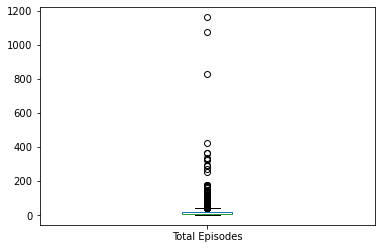

In [16]:
dp.plot.box()

# Median or Standard Deviation?
## std is more reliable in our case
## As you can see, the most frequent numbers are 0 and 1 which means there are 190 shows that have less than 2 episodes!


In [17]:
dp.median()

7.0

In [18]:
dp.mode()

0    1
dtype: int64

In [19]:
len(df[df['Total Episodes'] < 2])

190

In [20]:
dp.std()

61.62840942843583